# Tornado Seasonality - Historical vs. Recent

### Comparing Historical and Recent Occurrences by Season

To test changes in tornado seasonality, I used a combination of scatter plots and linear regression techniques. First, I created a scatter plot for each season using the following code.

In [1]:
# importing our packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# loading in the data from historical and recent occurrence tables into DataFrames
historical_data_inside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Historical_Tornado_Occurrences_Inside.xlsx")
historical_data_outside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Historical_Tornado_Occurrences_Outside.xlsx")
recent_data_inside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Recent_Tornado_Occurrences_Inside.xlsx")
recent_data_outside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Recent_Tornado_Occurrences_Outside.xlsx")


In [2]:
# grouping historical data by season and year, calculate the total tornado count
historical_inside_grouped = historical_data_inside.groupby(['Season', 'Year'])['Tornado_Count'].sum().reset_index()
historical_outside_grouped = historical_data_outside.groupby(['Season', 'Year'])['Tornado_Count'].sum().reset_index()
recent_inside_grouped = recent_data_inside.groupby(['Season', 'Year'])['Tornado_Count'].sum().reset_index()
recent_outside_grouped = recent_data_outside.groupby(['Season', 'Year'])['Tornado_Count'].sum().reset_index()


In [3]:
# creating a list of unique seasons
unique_seasons = historical_inside_grouped['Season'].unique()


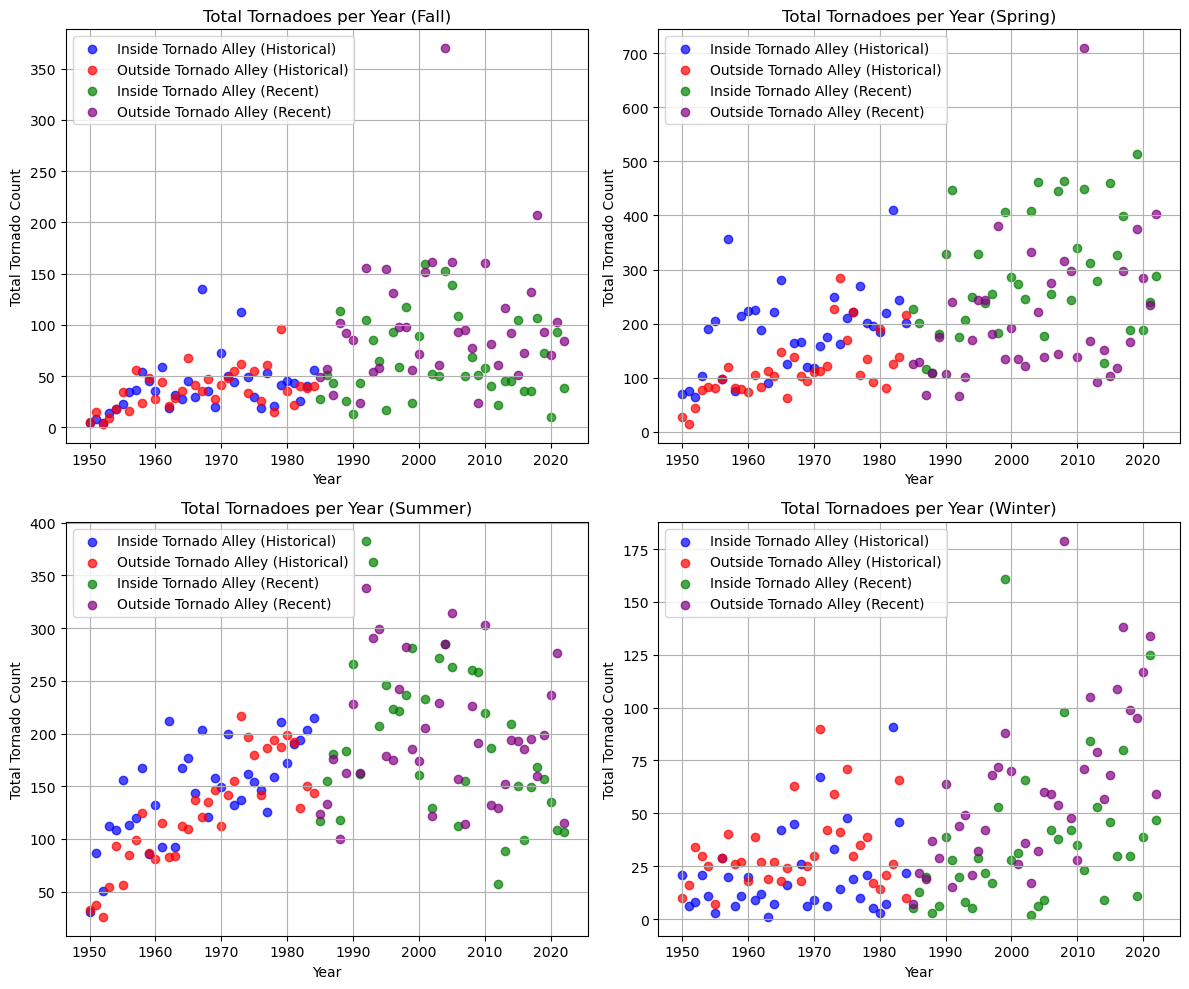

In [4]:
# creating the 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# iterating through the unique seasons and create scatter plots
for i, season in enumerate(unique_seasons):
    row = i // 2
    col = i % 2

    # filtering data for the current season
    historical_inside_season = historical_inside_grouped[season == historical_inside_grouped['Season']]
    historical_outside_season = historical_outside_grouped[season == historical_outside_grouped['Season']]
    recent_inside_season = recent_inside_grouped[season == recent_inside_grouped['Season']]
    recent_outside_season = recent_outside_grouped[season == recent_outside_grouped['Season']]

    # creating scatter plot in the current subplot
    axs[row, col].scatter(historical_inside_season['Year'], historical_inside_season['Tornado_Count'],
                         label='Inside Tornado Alley (Historical)', alpha=0.7, color='blue')
    axs[row, col].scatter(historical_outside_season['Year'], historical_outside_season['Tornado_Count'],
                         label='Outside Tornado Alley (Historical)', alpha=0.7, color='red')
    axs[row, col].scatter(recent_inside_season['Year'], recent_inside_season['Tornado_Count'],
                         label='Inside Tornado Alley (Recent)', alpha=0.7, color='green')
    axs[row, col].scatter(recent_outside_season['Year'], recent_outside_season['Tornado_Count'],
                         label='Outside Tornado Alley (Recent)', alpha=0.7, color='purple')

    # customizing the current subplot
    axs[row, col].set_title(f'Total Tornadoes per Year ({season})')
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Total Tornado Count')
    axs[row, col].grid()
    axs[row, col].legend()

# adjusting spacing between subplots
plt.tight_layout()

# showing the plot
plt.show()

Based on these scatter plots, there seems to be a  change in each season from historical data compared to recent data. How significant are these changes? To determine this, I used ANOVA testing.

### Statistical testing

In [5]:
# importing package
import scipy.stats as stats

# iterating through the unique seasons
for season in unique_seasons:
    # filtering data for the current season
    historical_inside_season = historical_inside_grouped[season == historical_inside_grouped['Season']]
    historical_outside_season = historical_outside_grouped[season == historical_outside_grouped['Season']]
    recent_inside_season = recent_inside_grouped[season == recent_inside_grouped['Season']]
    recent_outside_season = recent_outside_grouped[season == recent_outside_grouped['Season']]

    # performing ANOVA for each season and category
    f_statistic, p_value = stats.f_oneway(historical_inside_season['Tornado_Count'],
                                          historical_outside_season['Tornado_Count'],
                                          recent_inside_season['Tornado_Count'],
                                          recent_outside_season['Tornado_Count'])

    # setting alpha significance level
    alpha = 0.05

    # interpreting the results
    print(f'Season: {season}')
    if p_value < alpha:
        print("There is a significant change in tornado occurrences between historical and recent data.")
    else:
        print("There is no significant change in tornado occurrences between historical and recent data.")
    print()

Season: Fall
There is a significant change in tornado occurrences between historical and recent data.

Season: Spring
There is a significant change in tornado occurrences between historical and recent data.

Season: Summer
There is a significant change in tornado occurrences between historical and recent data.

Season: Winter
There is a significant change in tornado occurrences between historical and recent data.



According to the test results, there is a significant change in each season comparison. Are tornadoes increasing or decreasing in each season? To determine this, I used Linear Regression to detect the direction of new trends in tornado seasonality. 

### Using Linear Regression to detect trends in tornado occurrences

In [6]:
for season in unique_seasons:
    # filtering data for the current season
    historical_inside_season = historical_inside_grouped[season == historical_inside_grouped['Season']]
    historical_outside_season = historical_outside_grouped[season == historical_outside_grouped['Season']]
    recent_inside_season = recent_inside_grouped[season == recent_inside_grouped['Season']]
    recent_outside_season = recent_outside_grouped[season == recent_outside_grouped['Season']]

    # creating linear regression models
    model_inside_historical = LinearRegression()
    model_outside_historical = LinearRegression()
    model_inside_recent = LinearRegression()
    model_outside_recent = LinearRegression()

    # fitting the models
    model_inside_historical.fit(historical_inside_season[['Year']], historical_inside_season['Tornado_Count'])
    model_outside_historical.fit(historical_outside_season[['Year']], historical_outside_season['Tornado_Count'])
    model_inside_recent.fit(recent_inside_season[['Year']], recent_inside_season['Tornado_Count'])
    model_outside_recent.fit(recent_outside_season[['Year']], recent_outside_season['Tornado_Count'])

    # calculating the slopes (coefficients) for each model
    slope_inside_historical = model_inside_historical.coef_[0]
    slope_outside_historical = model_outside_historical.coef_[0]
    slope_inside_recent = model_inside_recent.coef_[0]
    slope_outside_recent = model_outside_recent.coef_[0]

    print(f'Season: {season}')
    print(f'Slope Inside Tornado Alley (Historical): {slope_inside_historical:.4f} ({ "Increase" if slope_inside_historical > 0 else "Decrease" if slope_inside_historical < 0 else "No Change"})')
    print(f'Slope Outside Tornado Alley (Historical): {slope_outside_historical:.4f} ({ "Increase" if slope_outside_historical > 0 else "Decrease" if slope_outside_historical < 0 else "No Change"})')
    print(f'Slope Inside Tornado Alley (Recent): {slope_inside_recent:.4f} ({ "Increase" if slope_inside_recent > 0 else "Decrease" if slope_inside_recent < 0 else "No Change"})')
    print(f'Slope Outside Tornado Alley (Recent): {slope_outside_recent:.4f} ({ "Increase" if slope_outside_recent > 0 else "Decrease" if slope_outside_recent < 0 else "No Change"})')
    print()

Season: Fall
Slope Inside Tornado Alley (Historical): 0.8328 (Increase)
Slope Outside Tornado Alley (Historical): 0.8773 (Increase)
Slope Inside Tornado Alley (Recent): -0.0133 (Decrease)
Slope Outside Tornado Alley (Recent): 0.7947 (Increase)

Season: Spring
Slope Inside Tornado Alley (Historical): 3.4787 (Increase)
Slope Outside Tornado Alley (Historical): 3.5370 (Increase)
Slope Inside Tornado Alley (Recent): 3.1808 (Increase)
Slope Outside Tornado Alley (Recent): 4.1264 (Increase)

Season: Summer
Slope Inside Tornado Alley (Historical): 3.0899 (Increase)
Slope Outside Tornado Alley (Historical): 4.2510 (Increase)
Slope Inside Tornado Alley (Recent): -2.4414 (Decrease)
Slope Outside Tornado Alley (Recent): -0.0220 (Decrease)

Season: Winter
Slope Inside Tornado Alley (Historical): 0.5969 (Increase)
Slope Outside Tornado Alley (Historical): 0.4583 (Increase)
Slope Inside Tornado Alley (Recent): 1.1147 (Increase)
Slope Outside Tornado Alley (Recent): 2.2899 (Increase)



The results show an increase in the total number of tornadoes in every season except for summer and fall. 